In [43]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv("4th_Y.csv")

In [45]:
spectra = data.iloc[:, :-1]
label = data.iloc[:, -1]
print(label)

0      Corn
1      Corn
2      Corn
3      Corn
4      Corn
       ... 
594     PAO
595     PAO
596     PAO
597     PAO
598     PAO
Name: Corn, Length: 599, dtype: object


In [46]:
pca = PCA(n_components=6)  
spectra_pca = pca.fit_transform(spectra)

print(spectra_pca)

[[ 0.03177772  0.08805125  0.38591843 -0.23855122 -0.08558801  0.02522693]
 [-0.01733636  0.10562029  0.32711682 -0.11782436  0.01968652 -0.06233689]
 [ 0.23691913  0.01843261  0.40690774 -0.14400696 -0.05031681  0.00376725]
 ...
 [ 0.61969615 -0.26450883 -0.29748256  0.53152297 -0.14386756 -0.32247191]
 [ 0.77888027  0.23105695 -0.27363955  0.32877742 -0.04372652  0.04155323]
 [ 0.05659795  0.34646058 -0.23342556  0.17546547 -0.14070215  0.03144665]]


In [47]:
pca_df = pd.DataFrame(data=spectra_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
pca_df['Label'] = label

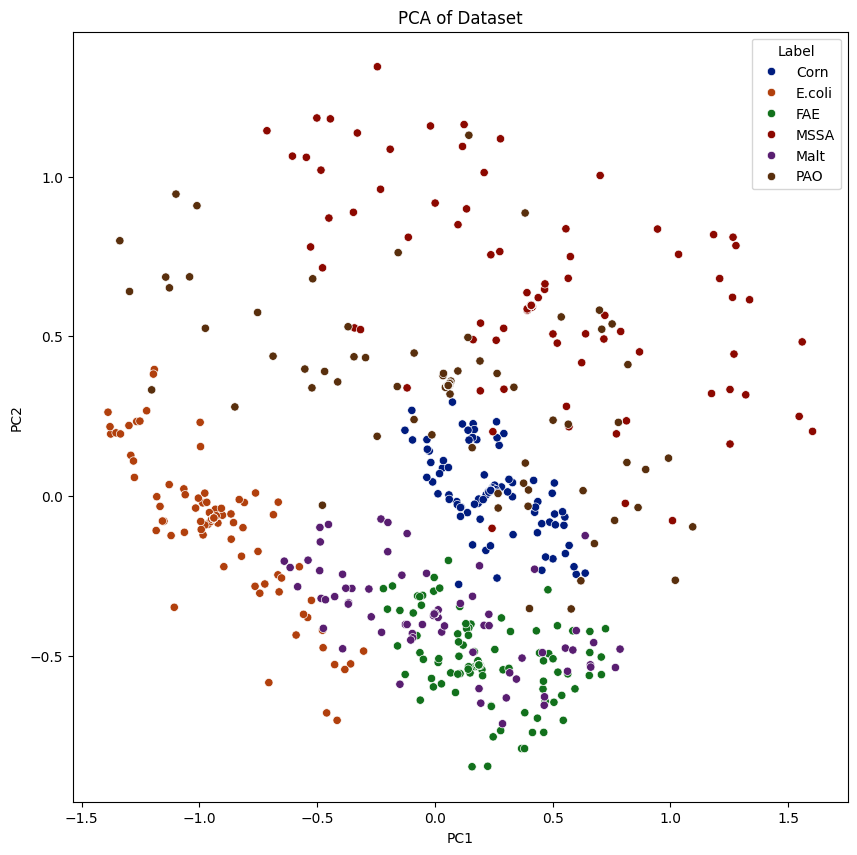

In [48]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=pca_df, palette='dark')
plt.title('PCA of Dataset')
plt.show()

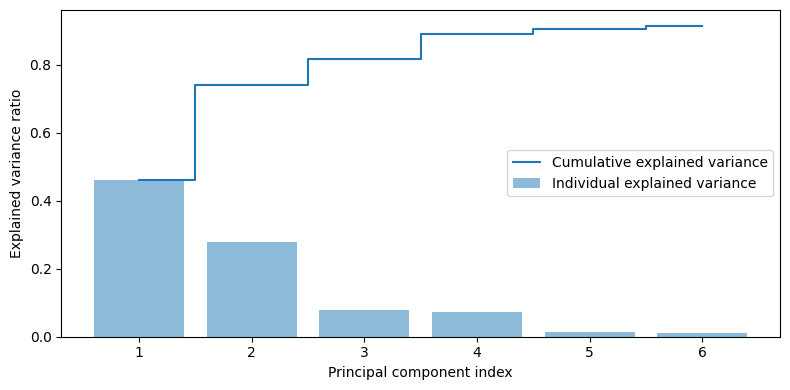

In [49]:
variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 4))
plt.bar(range(1, len(variance_ratio) + 1), variance_ratio, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(variance_ratio) + 1), variance_ratio.cumsum(), where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
